In [1]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

In [4]:
df = pd.read_csv("diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

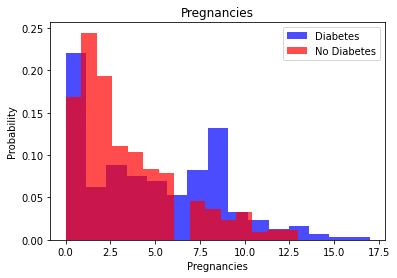

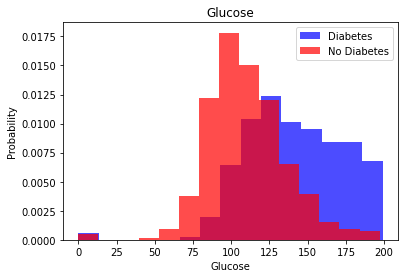

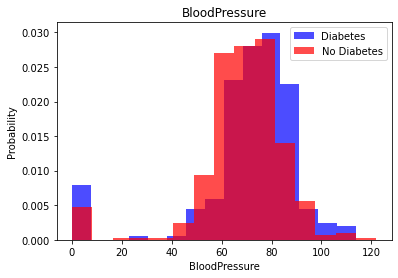

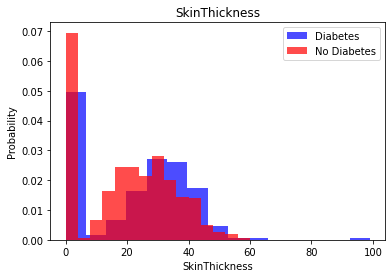

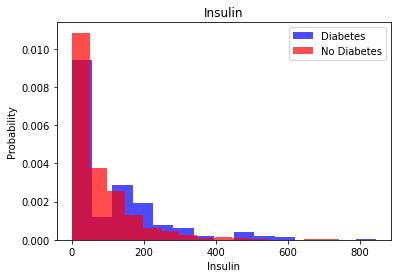

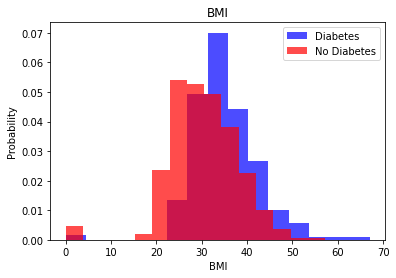

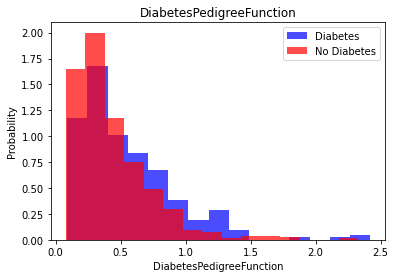

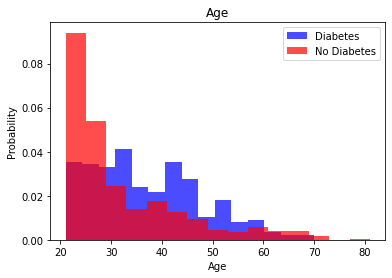

In [21]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  # print(df[df['Outcome']==1][label])
  plt.hist(df[df['Outcome']==1][label], color = 'blue', label = 'Diabetes',    alpha = 0.7, density = True, bins = 15)
  plt.hist(df[df['Outcome']==0][label], color = 'red',  label = 'No Diabetes', alpha = 0.7, density = True, bins = 15)
  '''alpha parameter: gives the shade between graphs
   density parameter: statets that if True, draw and
   return a probability density:each bin will display
   the bin's raw count divided by the total number of
   counts and the bin width.
   bins Parameter: bars of a histogram are called bins.
   The height of each bin shows how many values from 
   that data fall into that range
  '''
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()


In [24]:
df[df.columns[:-1]].values

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [26]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [28]:
X.shape, y.shape # We have to standardize it

((768, 8), (768,))

In [29]:
pre_processing_scalar = StandardScaler()
X = pre_processing_scalar.fit_transform(X)
'''After fitting in scalar we have to build a horiontal stack '''
data = np.hstack((X, np.reshape(y , (-1, 1) )))
'''We have to convert our Y into 2-D by using reshape and to convert it into DataFrame'''
transformed_df = pd.DataFrame(data, columns = df.columns)

In [30]:
transformed_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0.0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0.0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0.0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.0


In [38]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])
# '''As it not close to each other it can be a hurdle for NN to learn well'''

(268, 500)

In [40]:
random_over_sampler = RandomOverSampler()
X, y = random_over_sampler.fit_resample(X, y)
data = np.hstack((X, np.reshape(y , (-1, 1) )))
'''We have to convert our Y into 2-D by using reshape and to convert it into DataFrame'''
transformed_df = pd.DataFrame(data, columns = df.columns)

In [41]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [52]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, random_state = 0, test_size = 0.4)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, random_state = 0, test_size = 0.5)

In [53]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [54]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [55]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 3ms/step - loss: 0.7877 - accuracy: 0.4933


[0.7877417802810669, 0.4933333396911621]

In [56]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 3ms/step - loss: 0.7855 - accuracy: 0.5350


[0.785495400428772, 0.5350000262260437]

In [57]:
model.fit(X_train, y_train, batch_size = 16, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.7185 - accuracy: 0.5067 - val_loss: 0.6624 - val_accuracy: 0.6400
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.6583 - val_loss: 0.6153 - val_accuracy: 0.6600
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.7183 - val_loss: 0.5902 - val_accuracy: 0.6800
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7283 - val_loss: 0.5687 - val_accuracy: 0.6750
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.7433 - val_loss: 0.5490 - val_accuracy: 0.7050
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7433 - val_loss: 0.5309 - val_accuracy: 0.7200
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5347 - accuracy: 0.7367 - val_loss: 0.5153 - val_accuracy: 0.7350
Epoch 8/20
38/38 [==

In [58]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.4468 - accuracy: 0.7950


[0.4467969238758087, 0.7950000166893005]